# 基盤データサイエンス演習 第2回

※本演習資料の二次配布・再配布はお断り致します。

　本日は以下の演習を行う。

**DS2.1 | 記述統計と推測統計**

**DS2.2 | matplotlibを利用した図の描画**

　なお、課題提出のフォーマットが本資料の最後に添付されているので、課題提出の際はそれを利用せよ。

## DS2.1 | 記述統計と推測統計


　基盤データサイエンスの講義で、**記述統計 (descriptive statistics) と推測統計 (inferential statistics)** について学び、その中で**標本平均 (sample mean) は不偏推定量 (unbiased estimator) である**一方、**標本分散は不偏推定量ではない**ことを学んだ。

　この節では、**記述統計 (descriptive statistics) ：実際のデータを利用した統計量（標本平均・標本分散）の算出**および、**推測統計 (inferential statistics) ：標本平均・標本分散と母平均・母分散の関係の確認**を行う。


### DS2.1.0 | 用語解説

　今回は統計の単語を多数利用するので、以下の課題実行の前に少し整理する。

* **母集団 (population)** ：調査対象となる数値、属性等の源泉となる集合全体。確率分布として表現されることが多い。
* **母平均 (population mean)** ：母集団に対する平均。連続確率変数の場合、密度関数$f(x)$に対して、$\mu=\int xf(x)dx$で定義される。離散確率変数の場合も同様。
* **サンプル (sample)** ：（母集団から取り出した）具体的なデータセット。
* **標本平均 (sample mean)** ：具体的なデータセットに対して求めた算術（相加）平均。
* **統計量 (statistic)** ：データセットの特徴を要約した数値。平均や分散は統計量の代表的な例。
* **推定量 (estimator)** ：具体的なデータセットにもとづいて、母集団のパラメータを推定した量。
* **不偏推定量 (unbiased estimator)** ：データ生成に関する期待値が母集団を表す真のパラメータと一致することが保証された推定量。

なお、上記の説明における **データセット** とは、観測されたデータの集合 (List of observed data) であり、複数のデータからなる表形式のものである。 
 


### DS2.1.1 | データセットの準備

#### CSVファイル（`DS2_iris.csv`）をダウンロードし、内容を確かめる

　今回用いる `DS2_iris.csv` データはサンプルサイズが150件となっており、十分目視が可能なデータであるため、記述統計の統計量を算出する前に、今回用いるサンプル（データ）の内容を確認する。

　まず、ipynbファイルと一緒にOCW-iからダウンロードした `DS2_iris.csv` をExcelで目視してみよう。（もしExcelが使えない場合は、 `DS2_iris.csv` をGoogle Colabにアップロードし、アップロードしたファイルをダブルクリックすることで、ファイルの中身を見ることができる。）


　`DS2_iris.csv` をExcelで閲覧すると（**図2.1**）、データはそれぞれ4つの値と1つの名前から構成されていることがまず最初にわかる。
このサンプルをさらに細かく眺めると、例えば以下のようなことがわかる。

* NameはIris-setosa, Iris-versicolor, Iris-virginicaの3種類で、それぞれ50件ずつ存在している。
* PetalWidthに着目してみると、Iris-setosaは必ず1未満だが、その他の2種類は必ず1以上の値になっている。
* 同様に、PetalLengthもIris-setosaだけ値が小さめになっている。
* さらにPetalWidthについてよく見てみると、Iris-versicolorよりもIris-virginicaの方が値が高めになっている。

これらのことを目視で感じたら、次の節に進み、pythonを使って実際に確認してみよう。

--------------------

![iris.csvの中身](https://i.imgur.com/ElYyxgN.png)

**図2.1 |** DS2_iris.csvの中身


### DS2.1.1 | 記述統計：実際のデータを利用した統計量の算出


#### `pandas`を利用したファイルの読み込みと記述統計量の算出

　それでは、先ほどExcelを使って目視したファイルをPythonから読み込んでみよう。
まず、CSVファイル (`DS2_iris.csv`) をGoogle Colaboratory上にアップロードせよ（アップロード方法はGoogle Colaboratoryの使い方説明資料に記載されている）。

　つづいて、PythonからCSVファイルを読み込む。CSVファイルの読み込みには、pythonの `pandas` ライブラリを利用する。 
`pandas` は**表形式のサンプルを処理するのに頻出するライブラリ**なので確実に覚えておこう。

In [8]:
import pandas as pd            

In [9]:
df = pd.read_csv("DS2_iris.csv")   # CSVファイルを読み込み、dfという名前を付ける
print(df)                          # 読み込んだサンプル（データセット）を表示させてみる（一部のみが表示される）

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [10]:
print(len(df))                 # サンプルサイズ（データ件数）を取得する

150


In [11]:
print(df["Name"])              # Nameのみを取得する 

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [49]:
print([df["Name"] == "Iris-setosa"])

[0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Name, Length: 150, dtype: bool]


In [12]:
print(df[df["Name"] == "Iris-setosa"])   # NameがIris-setosaであるデータを全て取得する

    SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

In [13]:
print(df[df["SepalWidth"] <= 2.5])       # SepalWidthが2.5以下であるデータを全て取得する

     SepalLength  SepalWidth  PetalLength  PetalWidth             Name
41           4.5         2.3          1.3         0.3      Iris-setosa
53           5.5         2.3          4.0         1.3  Iris-versicolor
57           4.9         2.4          3.3         1.0  Iris-versicolor
60           5.0         2.0          3.5         1.0  Iris-versicolor
62           6.0         2.2          4.0         1.0  Iris-versicolor
68           6.2         2.2          4.5         1.5  Iris-versicolor
69           5.6         2.5          3.9         1.1  Iris-versicolor
72           6.3         2.5          4.9         1.5  Iris-versicolor
80           5.5         2.4          3.8         1.1  Iris-versicolor
81           5.5         2.4          3.7         1.0  Iris-versicolor
87           6.3         2.3          4.4         1.3  Iris-versicolor
89           5.5         2.5          4.0         1.3  Iris-versicolor
93           5.0         2.3          3.3         1.0  Iris-versicolor
98    

In [14]:
print(df["PetalWidth"].mean())           # PetalWidthの標本平均を取得する

1.1986666666666668


In [15]:
print(df["PetalWidth"].max())            # PetalWidthの最大値を取得する

2.5


　以上の関数を利用して、先ほどExcelで目視したことを1つ確かめてみよう。

In [48]:
## 事実: PetalWidthに着目してみると、Iris-setosaは必ず1未満である
## -> Name==Iris-setosaであるデータについて、PetalWidthの最大値を確認すればよい
setosa = df[df["Name"] == "Iris-setosa"]      # Name==Iris-setosaであるデータを抜き出して別名保存
print(setosa["PetalWidth"].max())

0.6


　上記のコードを実行すると、0.6という出力が得られる。つまり**Iris-setosaのPetalWidthは最大でも0.6**であり、確かに1未満であることが確認できる。このように2段階に分けて（別名保存しながら）データを処理すると混乱せずに済むので、慣れるまではこのようにすると良いだろう。

--------
##### 課題 DS2.1

　次に示すコードの `__xxxxx__` 部に適切な文字列を入力し、PetalLengthの最小値を取得せよ。

　課題提出時には、以下の2点を記述せよ。

* `__xxxxx__`を何に書き換えたか
* PetalLengthの最小値

In [17]:
print(df["PetalLength"].__xxxxx__())

AttributeError: 'Series' object has no attribute '__xxxxx__'

In [50]:
print(df["PetalLength"])

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLength, Length: 150, dtype: float64


In [18]:
print(df["PetalLength"].min())

1.0


-------

### DS2.1.2 | 推測統計

　これまでの記述統計では、既にあるサンプルの様々な値を確認したり、サンプルをまとめて表現するような値（標本平均、最小値など）を計算した。
一方、推測統計では、**手元にあるサンプル（データ）は母集団 (population) から無作為に取り出された「母集団の部分集合」である**という考え方に基づいて、サンプルから、母集団の平均や分散などの性質を明らかにすることを目的としている。

　言葉だけではわかりにくいと思うので、実際に計算を行ってみよう。
以下のコードは、**平均1、分散1の正規分布**から10件のデータ（これが1つのサンプルに対応する）を発生させ、標本平均 (sample mean) および標本分散 (sample variance) を計算している。

In [1]:
import random

# n件のデータからなる1つのサンプルを発生させる
def gen_sample(n):
    sample = []
    for i in range(n):
        sample.append(random.gauss(1,1))
    return sample

　次のコードは、10件のデータからなるサンプルの標本平均および標本分散を計算するコードである。実行毎に結果は変化するので、何度も実行してみてほしい。

In [2]:
import statistics
a_sample = gen_sample(10)

print(statistics.mean(a_sample))
print(statistics.pvariance(a_sample)) # 標本分散を計算する

0.621754156338984
0.48410505796922493


　資料作成の時には、5回実行してみると、標本平均が0.55～1.66、標本分散が0.74～1.07という結果が得られた。かなりばらつきがあるようだ。

　さて、この標本平均および標本分散の期待値（平均値）はいくらになるだろうか。沢山のサンプルを発生させ、標本平均と標本分散を毎回計算し、その平均値を求めてみることにする。

In [3]:
sample_means = []
for i in range(10000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
print(statistics.mean(sample_means))

0.9987970289764735


In [4]:

sample_variances = []
for i in range(10000):
    sample = gen_sample(10)
    sample_variance = statistics.pvariance(sample)
    sample_variances.append(sample_variance)
print(statistics.mean(sample_variances))

0.9090393149251554


In [12]:
import numpy as np
sample_variances = []
for i in range(10000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_variance = np.var(sample, ddof = 1)
    sample_variances.append(sample_variance)
print(statistics.mean(sample_variances))

1.0022141070159785


In [6]:
sample_means = []
sample_variances = []
for i in range(10000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
    sample_variance = statistics.variance(sample)
    sample_variances.append(sample_variance)
print(statistics.mean(sample_variances))

1.0027533045374741


In [7]:
sample_variances = []
for i in range(10000):
    sample =  gen_sample(10)
    sample_variance = sta

NameError: name 'sta' is not defined

　どうやら、標本平均の期待値（平均値）は1.0、標本分散の期待値（平均値）は0.9程度のようである。
ここで、元の分布の**分散は1**だったにも関わらず、**標本分散の平均値が0.9**であることに注意してほしい。すなわち、標本分散の期待値（平均値）は母分散（population variance, 元の分布の分散）とは一致しない（つまり、**標本分散は分散の不偏推定量 (unbiased estimator) ではない**）。

---------
##### 課題 DS2.2
　上記の検証ではサンプル数（サンプルサイズではない）を10,000にしていた。このサンプル数を100にした時、100,000にした時に、どのような変化が生じるだろうか。以下の2点について答えよ。（最大で30秒程度の計算時間を要する）
* 出力される標本平均・標本分散の精度（定性的な評価でかまわない）
* 値が表示されるまでにかかった時間とサンプル数との関係

　なお、計算時間の計測に関しては以下のコードを利用せよ。

In [46]:
import time
time_start = time.time() # 現在の時間を計測する

for i in range(10000):
  sample = gen_sample(10) 
  # CALC SOMETHING
time_end = time.time() # 現在の時間を計測する
print(time_end - time_start) # 開始時間と終了時間の差（秒）を計算する

0.11699700355529785


In [8]:
import random
import statistics
# n件のデータからなる1つのサンプルを発生させる
def gen_sample(n):
    sample = []
    for i in range(n):
        sample.append(random.gauss(1,1))
    return sample

import time
time_start = time.time() # Present time
sample_means = []
sample_variances = []
for i in range(100):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
    sample_variance = statistics.variance(sample)
    sample_variances.append(sample_variance)
mean = statistics.mean(sample_means)
variance = statistics.mean(sample_variances)
mean_accuracy = 1 - abs(mean-1)  
variance_accuracy = 1 - abs(variance-1)
time_end = time.time()
print("%.5f" % mean_accuracy)
print('%.5f' % variance_accuracy)
print(time_end - time_start)
time_end = time.time() # After calculation

0.99913
0.99624
0.0690302848815918


In [171]:
import random
import statistics
# n件のデータからなる1つのサンプルを発生させる
def gen_sample(n):
    sample = []
    for i in range(n):
        sample.append(random.gauss(1,1))
    return sample

import time
time_start = time.time() # Present time
sample_means = []
sample_variances = []
for i in range(10000):
    sample = gen_sample(10)
    sample_mean = statistics.mean(sample)
    sample_means.append(sample_mean)
    sample_variance = statistics.variance(sample)
    sample_variances.append(sample_variance)
mean = statistics.mean(sample_means)
variance = statistics.mean(sample_variances)
mean_accuracy = 1 - abs(mean-1)  
variance_accuracy = 1 - abs(variance-1)
time_end = time.time()
print("%.5f" % mean_accuracy)
print('%.5f' % variance_accuracy)
print(time_end - time_start)
time_end = time.time() # After calculation

0.99801
0.99476
5.653327465057373


-----
##### 課題 DS2.3

　`statistics.pvariance(sample)`は与えられたサンプルの標本分散 (sample variance) を求める関数であった。同様に、不偏推定量である不偏分散（unbiased variance）を求める関数が`statistics`に存在している。Google検索などを行い、不偏分散を求める関数の名前を答えよ。
ただし、例えば**Pythonの公式ドキュメントは母分散、標本分散などの単語を一部誤用している**ため、分散の定義や注釈なども読む必要があることに注意せよ。

　すぐに見つけられた受講生向け（採点対象外）：上記のコードを修正して、不偏分散の期待値（平均値）を計算し、不偏分散の平均値が母分散 (population variance) である1.0に漸近することを確認せよ。

-------

## 2.2 | matplotlibを利用した図の描画

　これまではひたすら数値を抜き出して表示させたり、あるいは平均値や最小値、最大値、分散などの値を計算していた。一方、沢山のデータの傾向を眺めるのに図を作成することは非常に効果的である。
ここでは、matplotlibという別のライブラリを利用して、図の作成を行ってみる。matplotlibを使うと、**図2.2**や**図2.3**のような図を簡単に作成することができる。


![ヒストグラムの例](https://i.imgur.com/YviFPUt.png)

**図 2.2 |** ヒストグラムの例

![箱ひげ図の例](https://i.imgur.com/xYREV5t.png)

**図 2.3 |** 箱ひげ図（box plot）の例


　




### 2.2.1 | matplotlibの利用準備
　まず、新しいライブラリを使う準備を行う。`pandas`でやった時と同じように`import`文を実行する。

In [26]:
import matplotlib.pyplot as plt  

　また、先ほどと同様のirisのデータを用いるため、準備を行う。
もしフォルダから `DS2_iris.csv` が消去されてしまっていたら、再度アップロードの作業を行った上で、以下のコードを実行する。

In [27]:
import pandas as pd
df = pd.read_csv("DS2_iris.csv") # CSVの読み込み  

### 2.2.2 | ヒストグラムの描画

　`matplotlib`を使って早速ヒストグラムを描画してみよう。
最も単純には、以下のコードで書くことができる。

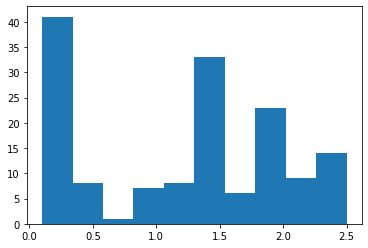

In [28]:
plt.hist(df["PetalWidth"]) # ヒストグラムを書く関数hist()に、ヒストグラムを描きたいデータを入力する
plt.show()                 # 図はprint()の代わりに、show()で表示する

　上記のコードでは、x軸やy軸がどういう値か図に示されていない。これを図に含めるためには、`plt.xlabel()`、`plt.ylabel()`を使えば良い。

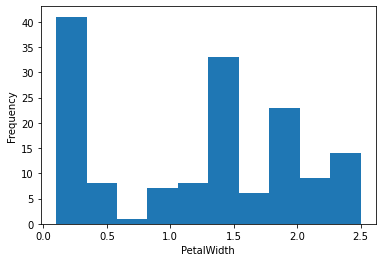

In [29]:
plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")   # x軸の説明
plt.ylabel("Frequency")    # y軸の説明
plt.show()

　このコードを実行することによって、 **図2.2** と同じ図を表示することができた。

　matplotlibで作成した図は、画像（png等）やPDFで保存することができる。この場合は、`plt.show()`関数の代わりに`plt.savefig(filename)`で保存する。

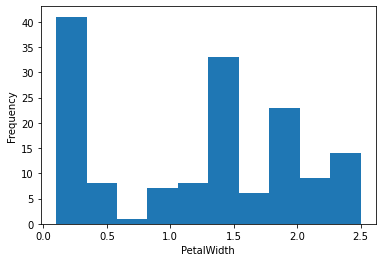

In [30]:
plt.hist(df["PetalWidth"])
plt.xlabel("PetalWidth")   # x軸の説明
plt.ylabel("Frequency")    # y軸の説明
plt.savefig("histogram_pWidth.png") # 拡張子によってPDFが生成されたり画像が生成されたりする
### Google Colabの場合は画面にも表示される

　作成したファイルは、csvファイルをアップロードした場所に表示される。もし表示されない場合は、「アップロード」ボタンの隣にある「更新」を栗供すれば表示されるはずである。

### 2.2.2 | 箱ひげ図 (boxplot) の描画

　箱ひげ図 (boxplot) は、以下の情報を一度に表示することで、データの分布の概形を知ることができるものである。

* （外れ値を除いた）最大値　　　　：最上部の横線
* 75パーセンタイル（第三四分位数）：箱の上面
* 50パーセンタイル（中央値）　　　：箱内部の赤線
* 25パーセンタイル（第一四分位数）：箱の下面
* （外れ値を除いた）最小値　　　　：最下部の横線
* 外れ値　　　　　　　　　　　　　：丸点

　それでは、Iris-setosaのPetalWidthについて、箱ひげ図を描画してみる。最も単純には、以下のコードで箱ひげ図を作成することができる。



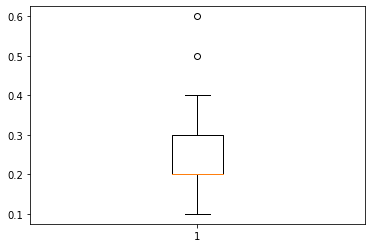

In [31]:
setosa = df[df["Name"] == "Iris-setosa"]
plt.boxplot(setosa["PetalWidth"])
plt.show()

　この場合は、第一四分位数と中央値が一致しているため、箱の下面が赤線になっている。

　次に、少し複雑な箱ひげ図を作成してみよう。Iris-setosa, Iris-versicolor, Iris-virginicaのそれぞれのPetalWidthの箱ひげ図を、同じグラフで表示する。複数のデータを入力するときは、`plt.boxplot()`に**配列として**与える。

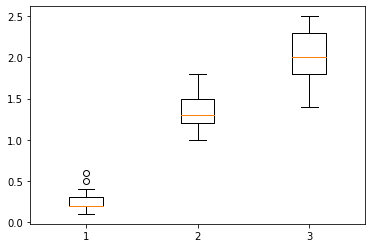

In [32]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.boxplot([setosa["PetalWidth"], versicolor["PetalWidth"], virginica["PetalWidth"]]) # 複数の入力を配列にまとめてあげる
plt.show()

　ところで、1, 2, 3ではどれがどのデータだかわからない。ここに"Iris-setosa"などと表示させたい場合には、
`plt.boxplot()`関数の`labels`引数を用いる。以下のコードで作成した図が、**図2.3**である。

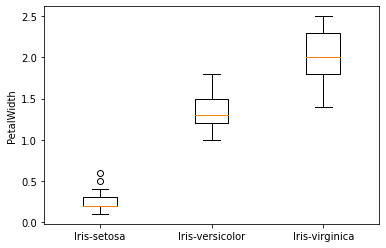

In [33]:
setosa = df[df["Name"] == "Iris-setosa"]
versicolor = df[df["Name"] == "Iris-versicolor"]
virginica = df[df["Name"] == "Iris-virginica"]

plt.boxplot([setosa["PetalWidth"], versicolor["PetalWidth"], virginica["PetalWidth"]],
            labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.ylabel("PetalWidth")
plt.show() 

### 2.2.3 | 散布図の描画

　さらに、散布図 (scatter plot) を作成してみる。散布図は二つの変数の関係を見る際に非常に有用である。

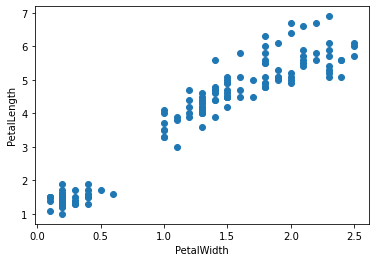

In [34]:
plt.scatter(df["PetalWidth"], df["PetalLength"])
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")

plt.show()

　散布図では、凡例を記述することができる。

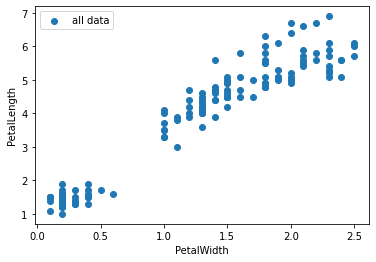

In [35]:
plt.scatter(df["PetalWidth"], df["PetalLength"], label="all data") # labelが凡例に表示される
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # 凡例を表示
plt.show()

---------------
##### 課題 DS2.4

　**図2.4**のように、図の上部にタイトルを付けたい。Google検索などを駆使して、どのような関数を利用すればよいか答え、実際に作成した図を併せて添付せよ。

![図2.4](https://i.imgur.com/m6vQ6sV.png)

**図2.4 |** タイトル込みの描画例（部分）

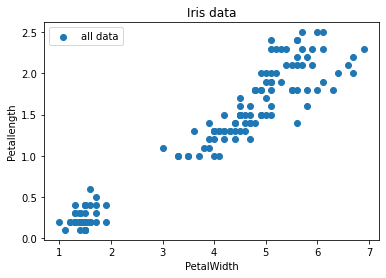

In [157]:
plt.scatter( df["PetalLength"],df["PetalWidth"], label = "all data")
plt.xlabel("PetalWidth")
plt.ylabel("Petallength")
plt.legend()
plt.title('Iris data')
plt.show()

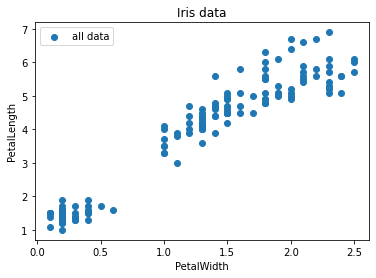

In [66]:
plt.scatter(df["PetalWidth"], df["PetalLength"], label="all data") # labelが凡例に表示される
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # 凡例を表示
plt.title('Iris data')
plt.show()

Text(0.5, 1.0, 'Iris data')

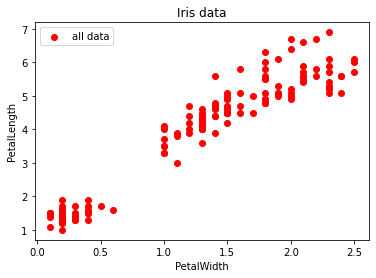

In [209]:
df = pd.read_csv("DS2_iris.csv")
a1 = df["PetalWidth"]
b1 = df['PetalLength']
plt.scatter(a1[:], b1[:], label="all data", marker='o', c='r', cmap='plasma') # labelが凡例に表示される
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend() # 凡例を表示a = 'Iris-setosa' ,b = 'Iris-versicolor' c = 'Iris-virginica'
plt.title('Iris data')


In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap='plasma')

--------
##### 課題 DS2.5（発展）
　箱ひげ図同様に、散布図でもsetosa, versicolor, virginicaの区別をつけて描画してみたい。**図2.5**を例に、凡例を付けて、3種類のデータが区別できるように散布図を描画せよ（色の順番は図2.5と異なっていても良い）。
提出の際には、`plt.rcParams["font.size"]` を設定することで、図2.5とフォントサイズが異なることが視認できるようにせよ。

![図2.5](https://i.imgur.com/ep8wlSh.png)

**図2.5** 描画例 

----------

In [59]:
df["PetalWidth"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidth, Length: 150, dtype: float64

In [198]:
import pandas as pd
df = pd.read_csv("DS2_iris.csv")
df.tail(100)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [225]:
a = df[df["Name"] == 'Iris-setosa'] 
a.head(5)

KeyError: 'Column not found: False'

In [76]:
d = df.groupby("Name")
d

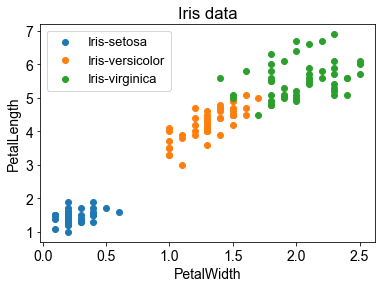

In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
d = df.groupby("Name")
for x,y in d:
    plt.scatter(y["PetalWidth"], y["PetalLength"], label=x)
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend(loc='best',fontsize = 13) 
mpl.rcParams['font.size']= 14
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['figure.figsize'] = (6,4)
plt.title('Iris data')
plt.show()

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  50 non-null     float64
 1   SepalWidth   50 non-null     float64
 2   PetalLength  50 non-null     float64
 3   PetalWidth   50 non-null     float64
 4   Name         50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [ ]:

for i in enumerate(a):
    plt.scatter(a["PetalWidth"], a["PetalLength"], label="k") 
for i in enumerate(b):
    plt.scatter(b["PetalWidth"], b["PetalLength"], label="k") 
for i in enumerate(c):
    plt.scatter(c["PetalWidth"], c["PetalLength"], label="k") 

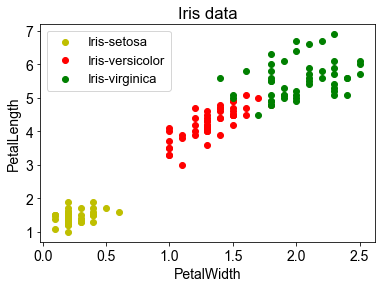

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
df = pd.read_csv("DS2_iris.csv")
a = df[df["Name"] == 'Iris-setosa'] 
b = df[df["Name"] == 'Iris-versicolor']
c = df[df["Name"] == 'Iris-virginica']
plt.scatter(a["PetalWidth"], a["PetalLength"], label="Iris-setosa",marker='o', c='y', cmap='plasma')
plt.scatter(b["PetalWidth"], b["PetalLength"], label="Iris-versicolor",marker='o', c='r', cmap='plasma')
plt.scatter(c["PetalWidth"], c["PetalLength"], label="Iris-virginica",marker='o', c='g', cmap='plasma')
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend(loc='best',fontsize = 13) 
mpl.rcParams['font.size']= 14
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['figure.figsize'] = (6,4)
plt.title('Iris data')
plt.show()

In [50]:
df = pd.read_csv("DS2_iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df = pd.read_csv("DS2_iris.csv")
df = df.groupby("Name")
df

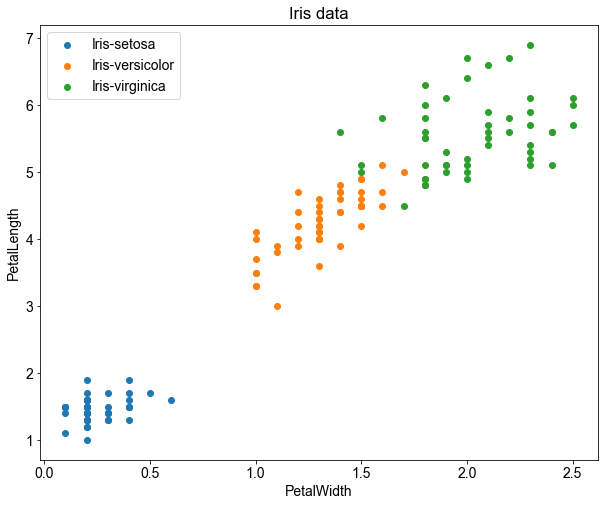

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
df = pd.read_csv("DS2_iris.csv")
a = df[df["Name"] == 'Iris-setosa'] 
b = df[df["Name"] == 'Iris-versicolor']
c = df[df["Name"] == 'Iris-virginica']
plt.scatter(a["PetalWidth"], a["PetalLength"], label="Iris-setosa")
plt.scatter(b["PetalWidth"], b["PetalLength"], label="Iris-versicolor")
plt.scatter(c["PetalWidth"], c["PetalLength"], label="Iris-virginica")
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.legend(loc='best') 
mpl.rcParams['font.size']= 14
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['figure.figsize'] = (10,8)
plt.title('Iris data')
plt.show()

# レポート提出について



## レポートの提出方法

　レポートは**答案テンプレートを用い**、**1つのファイル（.doc, .docx, .pdf）**にまとめ、**学籍番号と氏名を確認の上**、**次回 基盤データサイエンス演習 の開始時刻までに東工大ポータルのOCW-iから提出**すること。
ファイルのアップロード後、OCW-iで「提出済」というアイコンが表示されていることを必ず確認すること。それ以外の場合は未提出扱いとなるので十分注意すること。
また、締め切りを過ぎるとファイルの提出ができないため、時間に余裕を持って提出を行うこと。


## 答案テンプレート

```
学籍番号:
名前:

課題 DS2.1
`__xxxxx__` = ______min________
PetalLengthの最小値：___1.0_____

課題 DS2.2
出力される値の精度：
　_____________________________________
値が表示されるまでにかかった時間とサンプル数との関係：
　_____________________________________

課題 DS2.3
不偏分散を求める関数の名前は「________________」である。

課題 DS2.4
plt.______(______) を記述すると"Iris data"というタイトルを表示させることができる。
plt.title('Iris data')
（ここに図を貼る）


課題 DS2.5

（ここに図を貼る）

```

# 補足資料

## ※1：matplotlibで作れる様々な図

matplotlibは他にも様々な図、あるいは複雑な図を作成することが可能である。[matplotlibのチュートリアル](https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)など、参考にしてほしい。
